<div> 
    
<h1 align="center"> INF1007 - Automne 2025 </h1>
<h2 align="center"> TP3 - Analyse de données sur les AVC avec des librairies scientifiques</h2>
<br>
    
</div> 

<b>
Travail réalisé par : <br>
<br></b>
Remplacer par votre nom <br>
Remplacer par votre nom <br>
<br>
<b>
Numéro de groupe de laboratoire :
<br><br>
</b>
Remplacer par votre numéro de groupe (LXX-XX)
<br>


In [30]:
# Installations des librairies nécessaires pour le TP. 
# Vous avez seulement besoin d'exécuter cette cellule une seule fois, lors de la première utilisation du Jupyter Notebook.
# Vous pouvez ensuite mettre les installations en commentaire pour éviter de les réexécuter à chaque fois que vous exécutez le Notebook au complet (avec "Run All").

%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install plotly
%pip install numpy 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


<h1><font color='lightblue'> Partie 1 - Chargement d'une base de données avec Pandas </font></h1>


<div class="alert alert-block alert-info" style="font-size:16px;">

Pour cette première partie du TP, nous utiliserons la librairie Pandas. Pour importer la librairie dans le Jupyter Notebook, vous pouvez exécuter la cellule suivante. 


In [31]:
import pandas as pd
import numpy as np

<div class="alert alert-block alert-info" style="font-size:16px;">
<b>
1.1 Vous devez compléter la fonction "charger_donnees", qui permet de charger le contenu d'un fichier .csv en un DataFrame Pandas. 
</b>
<br><br> 
Un DataFrame Pandas est une structure de données tabulaire à deux dimensions, similaire à une feuille de calcul Excel. Il est composé de lignes et de colonnes, où :
<br><br> 

- Chaque colonne représente une variable (ou un attribut) et a un nom.
<br>

- Chaque ligne représente une entrée (ou un enregistrement).
<br>

- Les indices (index) permettent d’identifier les lignes.
<br>

In [ ]:
import pandas as pd

def charger_donnees(file_path):
    """
    Lire le fichier csv passé en parametre et retourner un DataFrame contenant les données du fichier csv.
    @param file_path: le chemin vers le fichier csv (str)
    @return: DataFrame contenant les données du fichier csv. 
    """

    try:
        df = pd.read_csv(file_path)
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='latin-1')
    except FileNotFoundError as e:
        raise FileNotFoundError(f"Fichier introuvable: {file_path}") from e

    # Fin du code
    return df


<div class="alert alert-block alert-info" style="font-size:16px;">
<b>
1.2 Utilisez la fonction charger_donnees que vous venez de compléter pour charger le contenu du fichier AVC.csv dans un DataFrame pandas. </b> 


In [33]:
# TODO Charger le fichier csv de données 
df_avc = charger_donnees("AVC.csv")


<div class="alert alert-block alert-info" style="font-size:16px;">
<b>
1.3 Affichez les 5 premières lignes du DataFrame pour vérifier le chargement. </b> 
<br>

In [34]:
# TODO Afficher les 5 premières lignes du DataFrame  
df_avc = charger_donnees("AVC.csv")
print(df_avc.head(5))


  Patient_ID  Âge Sexe      Type_AVC Date_survenue Hypertension Diabète  \
0       P001   54    M    Ischémique    2024-02-17          Non     Non   
1       P002   65    F  Hémorragique    2024-12-17          Oui     Non   
2       P003   51    F    Ischémique    2024-08-31          Non     Non   
3       P004   53    F    Ischémique    2024-10-10          Oui     Oui   
4       P005   64    M    Ischémique    2024-05-28          Oui     Non   

  Cholestérol_élevé  Durée_hospitalisation  
0               Non                      3  
1               Oui                     13  
2               Oui                      9  
3               Oui                      4  
4               Oui                      6  


<div class="alert alert-block alert-info" style="font-size:16px;">
<b>
1.4. Complétez la fonction supprimer_colonnes qui permet de supprimer une ou des colonnes d'un DataFrame. 
 </b> 
<br>

In [35]:
def supprimer_colonnes(dataframe, colonnes):
    """
    Supprime les colonnes non pertinentes.

    @param dataframe : Le DataFrame à nettoyer.
    @param colonnes : Liste ou nom(s) de colonnes à supprimer.
    @return :  Le DataFrame avec les colonnes supprimées
    """
    # TODO Écrire votre code ici
    
    dataframe = dataframe.drop(columns=colonnes)

    return dataframe


<div class="alert alert-block alert-info" style="font-size:16px;">
<b>
1.5 Dans le cadre de votre recherche, vous vous rendez compte que vous ne séparez pas les sujets selon qu’ils aient un diabète ou non, donc cette colonne ne vous est d’aucune utilité. De plus, la date de survenue a peu d’importance dans vos analyses actuelles. Utilisez donc la fonction supprimer_colonnes que vous avez complétée pour supprimer les colonnes "Diabète" et "Date_survenue" de votre DataFrame.  </b> 
<br>

In [36]:
# TODO Supprimer les colonnes "Diabète" et "Date_survenue" de votre dataframe. Remplacez None. 
df_avc = supprimer_colonnes(df_avc, ["Diabète", "Date_survenue"])



<div class="alert alert-block alert-info" style="font-size:16px;">
<b>
1.6 Vérifiez que vos données sont uniformes et que vos colonnes sont bien supprimées en affichant les 15 premières lignes du DataFrame.
<br>

In [37]:
# TODO Afficher les 15 premières lignes du DataFrame
df_avc = charger_donnees('AVC.csv')
print(df_avc.head(15))


   Patient_ID  Âge Sexe      Type_AVC Date_survenue Hypertension Diabète  \
0        P001   54    M    Ischémique    2024-02-17          Non     Non   
1        P002   65    F  Hémorragique    2024-12-17          Oui     Non   
2        P003   51    F    Ischémique    2024-08-31          Non     Non   
3        P004   53    F    Ischémique    2024-10-10          Oui     Oui   
4        P005   64    M    Ischémique    2024-05-28          Oui     Non   
5        P006   36    M  Hémorragique    2024-01-22          Non     Non   
6        P007   53    F    Ischémique    2024-01-26          Oui     Non   
7        P008   49    m    Ischémique    2024-10-22          Non     Oui   
8        P009   46    M  Hémorragique    2024-10-19          Non     Non   
9        P010   59    m    Ischémique    2024-06-26          Oui     Non   
10       P011   62    f    Ischémique    2024-05-03          Oui     Non   
11       P012   61    M    Ischémique    2024-08-21          Non     Non   
12       P01

<div class="alert alert-block alert-info" style="font-size:16px;">
<b>
1.7 Après vérification, vous vous rendez compte que certaines valeurs de la colonne "Sexe" sont en majuscules et d’autres en minuscules. Cela pourrait causer des problèmes lors de la sélection des groupes pour la visualisation des données.
<br>

Pour éviter toute erreur, complétez la fonction majuscule permettant de mettre toutes les valeurs de la colonne "Sexe" en majuscules.
<b>


In [38]:
# TODO Créer une fonction pour convertir la colonne 'Sexe' en masjucule - indice : vous pouvez utiliser .str.upper()
def majuscule(dataframe):
    """
    Met toutes les valeurs de la colonne 'Sexe' en majuscules.

    @param dataframe : Le DataFrame à corriger.
    @return : Le DataFrame avec la colonne 'Sexe' en majuscules.
    """
    dataframe['Sexe'] = dataframe['Sexe'].str.strip().str.upper()
    return dataframe

<div class="alert alert-block alert-info" style="font-size:16px;">
<b>
1.8 Utilisez la fonction majuscule() pour convertir la colonne 'Sexe'.
<br>
<b>


In [39]:
# TODO Mettre en majuscule toute la colonne 'Sexe'.
df_avc = majuscule(df_avc)



<div class="alert alert-block alert-info" style="font-size:16px;">
<b>
1.9 Pour vérifier que votre fonction a bien fonctionné, affichez de nouveau les 15 premières lignes du DataFrame.
<br>
<b>


In [40]:
# TODO Afficher les 15 premières lignes du DataFrame
print(df_avc.head(15))


   Patient_ID  Âge Sexe      Type_AVC Date_survenue Hypertension Diabète  \
0        P001   54    M    Ischémique    2024-02-17          Non     Non   
1        P002   65    F  Hémorragique    2024-12-17          Oui     Non   
2        P003   51    F    Ischémique    2024-08-31          Non     Non   
3        P004   53    F    Ischémique    2024-10-10          Oui     Oui   
4        P005   64    M    Ischémique    2024-05-28          Oui     Non   
5        P006   36    M  Hémorragique    2024-01-22          Non     Non   
6        P007   53    F    Ischémique    2024-01-26          Oui     Non   
7        P008   49    M    Ischémique    2024-10-22          Non     Oui   
8        P009   46    M  Hémorragique    2024-10-19          Non     Non   
9        P010   59    M    Ischémique    2024-06-26          Oui     Non   
10       P011   62    F    Ischémique    2024-05-03          Oui     Non   
11       P012   61    M    Ischémique    2024-08-21          Non     Non   
12       P01

<h1><font color='lightgreen'> Partie 2 - Calcul des statistiques </font></h1>

<div class="alert alert-block alert-success" style="font-size:16px;"> <b> 
Dans cette deuxième partie du TP, vous allez manipuler les données du DataFrame que vous venez de nettoyer. </div>

<div class="alert alert-block alert-success" style="font-size:16px;"> <b> 
<b>
2.1 Affichez le nombre de femmes versus d'hommes ayant eu un AVC, ainsi que le nombre d'AVC hémorragiques versus ischémiques par genre également.
<br>

In [41]:
# Indice: Vous pouvez utiliser value_counts().  

# TODO Afficher en une seule commande le nombre de femmes et d'hommes ayant eu un AVC. 
print("Nombre de patients par sexe :")
f_vs_m= df_avc['Sexe'].value_counts()
print(f_vs_m)

# TODO Afficher la répartition des AVC (hémorragiques vs ischémiques) selon le sexe.
print("\nRépartition des AVC par type et par sexe :")
h_vs_i= df_avc.groupby(['Sexe', 'Type_AVC']).size()
print(h_vs_i)

Nombre de patients par sexe :
Sexe
F    58
M    42
Name: count, dtype: int64

Répartition des AVC par type et par sexe :
Sexe  Type_AVC    
F     Hémorragique    14
      Ischémique      44
M     Hémorragique     9
      Ischémique      33
dtype: int64


<div class="alert alert-block alert-success" style="font-size:16px;"> <b> 
<b> 2.2 Complétez la fonction stats_par_groupe qui permet de calculer une ou des statistiques d'une colonne du DataFrame selon un groupe sélectionné.
<br>

In [42]:
# TODO  Complétez la fonction stats_par_groupe - Indice : les fonctions groupby() et agg() pourront vous être utiles. 
def stats_par_groupe(df, colonne_groupe, colonne_valeur, fonctions):
    """
    Cette fonction doit calculer des statistiques pour une colonne selon un groupe.

    @param df : DataFrame
    @param colonne_groupe : colonne pour le groupement (ex: 'Sexe')
    @param colonne_valeur : colonne à analyser (ex: 'Âge')
    @param fonctions : liste ou fonction à appliquer (ex: ['mean','std'])
    @return : DataFrame des statistiques
    """
    #Remplacez le None par votre code. 
    df_stats = df.groupby(colonne_groupe, dropna=False)[colonne_valeur].agg(fonctions)

    if isinstance(df_stats, pd.Series):
      df_stats = df_stats.to_frame(fonctions)

    #Ne modifiez pas le code ci-dessous c'est pour l'affichage.
    df_stats_long = df_stats.stack().reset_index()
    # Renommage uniquement des deux dernières colonnes
    df_stats_long.rename(columns={df_stats_long.columns[1]: "Statistique",
                                  df_stats_long.columns[2]: "Valeur"}, inplace=True)
    
    return df_stats_long

<div class="alert alert-block alert-success" style="font-size:16px;"> <b> 
<b> 2.3 À l'aide de la fonction stats_par_groupe, affichez les statistiques demandées dans les cellules suivantes.</b>
<br>

In [43]:
#TODO Affichez la moyenne et l'écart-type de l'âge des sujets en fonction du genre. 
stats_age_sexe = stats_par_groupe(df_avc, 'Sexe', 'Âge', ['mean', 'std'])
print(stats_age_sexe)


  Sexe Statistique     Valeur
0    F        mean  67.155172
1    F         std  11.548223
2    M        mean  50.928571
3    M         std  11.843271


In [44]:
#TODO Affichez l'âge minimum et maximum des sujets par sexe.
stats_age_min_max = stats_par_groupe(df_avc, 'Sexe', 'Âge', ['min', 'max'])
print(stats_age_min_max)


  Sexe Statistique  Valeur
0    F         min      50
1    F         max      89
2    M         min      35
3    M         max      74


In [45]:
#TODO Affichez la durée moyenne d'hospitalisation par type d'AVC
stats_duree = stats_par_groupe(df_avc, 'Type_AVC', 'Durée_hospitalisation', 'mean')
print(stats_duree)


       Type_AVC Statistique     Valeur
0  Hémorragique        mean  18.260870
1    Ischémique        mean   8.220779


<div class="alert alert-block alert-success" style="font-size:16px;"> <b> 
<b> 2.4 Complétez la fonction suivante pour déterminer la proportion de patients ayant de l’hypertension selon le type d’AVC (ischémique ou hémorragique).
<br>

In [46]:
# TODO Calculer la proportion de patients ayant de l'hypertension par type d'AVC
def proportion_hypertension_par_type_avc(dataframe):
    """
    Calcule la proportion (en %) de patients avec hypertension pour chaque type d'AVC.

    @param dataframe : Le DataFrame contenant les colonnes 'Hypertension' et 'Type_AVC'.
    @return : Un DataFrame avec la proportion en pourcentage par type d'AVC, arrondie à 2 décimales.
    """

    #TODO Créez une nouvelle colonne "Hypertension_bin" dans le DataFrame de telle sorte que :
    # - si le patient a de l'hypertension, on lui associe le chiffre 1 ("Oui" → 1)
    # - s’il n’a pas d'hypertension, on lui associe le chiffre 0 ("Non" → 0)
    # Cela permet de manipuler les données plus facilement pour les calculs statistiques ou les graphiques.

    dataframe['Hypertension_bin'] = dataframe['Hypertension'].map({'Oui':1, 'Non':0})
    
    #TODO Calculer la proportion moyenne de patients ayant de l'hypertension (proportion de Oui) pour chaque type d'AVC (en pourcentage avec 2 décimales) 
    #N'oubliez pas d'ajouter le symbole "%"
    df_pourcentage = (dataframe.groupby('Type_AVC')['Hypertension_bin'].mean()*100).round(2).astype(str) + '%'
    

    # Transformer en DataFrame avec Type_AVC comme colonne
    df_result = df_pourcentage.reset_index()
    df_result.columns = ['Type_AVC', 'Hypertension']
    return df_result

<div class="alert alert-block alert-success" style="font-size:16px;"> <b> 
<b> 2.5 Affichez le DataFrame contenant la proportion (en %) de patients ayant de l’hypertension, regroupée par type d’AVC.
<br>

In [47]:
#TODO Affichez le Dataframe résultant de la fonction proportion_hypertension_par_type_avc
print(proportion_hypertension_par_type_avc(df_avc))


       Type_AVC Hypertension
0  Hémorragique       34.78%
1    Ischémique       50.65%


<h1><font color='coral'> Partie 3 - Visualisation des données </font></h1>

<div class="alert alert-warning" style="font-size:16px;">
<b> Pour les graphiques demandés dans cette section, vous aurez besoin des librairies suivantes. Assurez-vous d'exécuter la prochaine cellule. <b>

In [48]:
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt 

<div class="alert alert-warning" style="font-size:16px;">
<b>
3.1 Visualisez la durée d’hospitalisation selon le sexe et le type d’AVC
<br> 

Utilisez seaborn pour créer des violinplots montrant la distribution de la durée d’hospitalisation.
<br> 

Affichez deux graphiques côte à côte :

-   Le premier : durée d’hospitalisation par Sexe. Couleurs : Homme -> Bleu, Femme -> Rouge 

-   Le second : durée d’hospitalisation par Type d’AVC. Couleurs : Hémorragique -> Vert, Ischémique -> Orange

N’oubliez pas de donner un titre clair à chaque graphique, des noms de légendes et d’ajuster la mise en page avec plt.tight_layout().

Indice : vous pouvez utiliser plt.subplots pour créer plusieurs axes. 
<b>


C:\Users\tsonny\AppData\Local\Temp\ipykernel_27900\2943627718.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\tsonny\AppData\Local\Temp\ipykernel_27900\2943627718.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




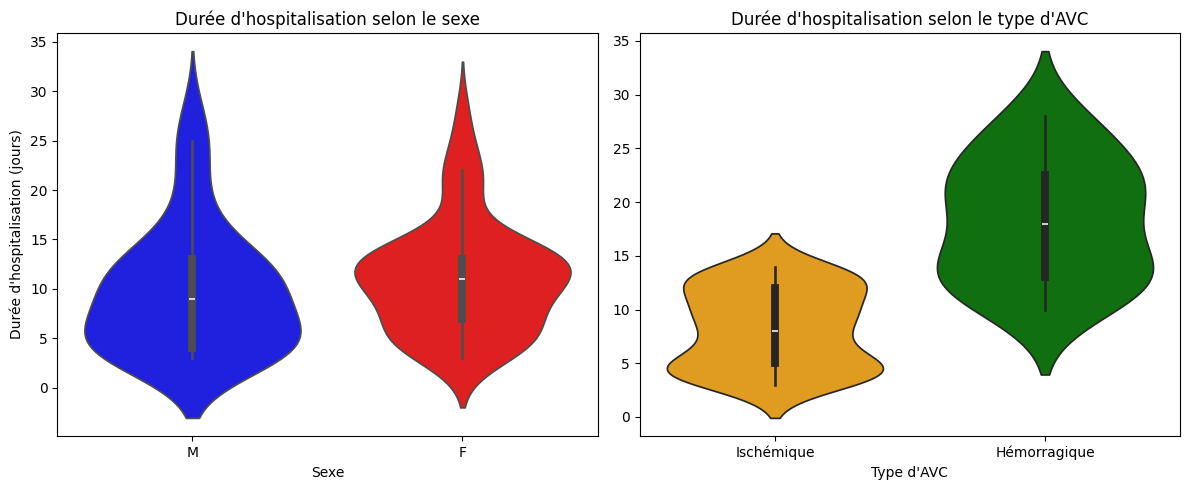

In [49]:
# TODO Tracer le diagramme en violon avec seaborn
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.violinplot(
    data=df_avc,
    x='Sexe',
    y='Durée_hospitalisation',
    palette={'M':'blue','F':'red'},
    ax=axes[0]
)
axes[0].set_title("Durée d'hospitalisation selon le sexe")
axes[0].set_xlabel('Sexe')
axes[0].set_ylabel("Durée d'hospitalisation (jours)")

sns.violinplot(
    data=df_avc,
    x="Type_AVC",
    y="Durée_hospitalisation",
    palette={"Hémorragique":"green","Ischémique":"orange"},
    ax=axes[1]
)
axes[1].set_title("Durée d'hospitalisation selon le type d'AVC")
Axes_labels = axes[1]
axes[1].set_xlabel("Type d'AVC")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


<div class="alert alert-warning" style="font-size:16px;">
<b> 
3.2 Visualisez la relation entre l’âge et la durée d’hospitalisation</br>

Utilisez Plotly Express pour créer un nuage de points (scatter plot).

- Sur l’axe X : Âge

- Sur l’axe Y : Durée_hospitalisation

Différenciez les points selon le sexe (color='Sexe')

Créez des sous-graphes (subplots) pour chaque type d’AVC afin de comparer facilement les distributions.

Ajoutez un titre clair à la figure et centrez-le.

Affichez la figure avec fig.show().

Indice : facet_col est un argument utilisé pour faire des facettes (c'est-à-dire des sous-graphiques alignés dans la même figure) pour chaque variable unique dans une colonne. Cet argument est donc utilisable pour générer automatiquement les subplots par catégorie de Type_AVC.</br>
</div>


In [50]:
# TODO Tracer le nuage de points 3D avec Plotly express
import plotly.express as px

fig = px.scatter(
    df_avc,
    x="Âge",
    y="Durée_hospitalisation",
    color="Sexe",
    facet_col="Type_AVC",        
    title="Relation entre l'âge et la durée d'hospitalisation selon le type d'AVC"
)

fig.update_layout(title_x=0.5)

fig.show()


<h1><font color='cornflowerblue'> Bonus (+1 point) - Affichage d'un graphique en barre superposé. </font></h1>

<div class="alert alert-success" style="font-size:16px; color: darkblue; background-color: cornflowerblue;">
<b>Pour obtenir 1 point bonus, vous pouvez utiliser la librairie matplotlib pour visualiser l’évolution mensuelle des AVC selon le type.  </b><br>
<br>
Pour cette question, utilisez le Dataframe initial. 

- À partir de la colonne Date_survenue, extrayez le mois pour chaque patient.

- Calculez le nombre de cas d’AVC ischémique et d’AVC hémorragique pour chaque mois de 2024.

- Créez un barplot superposé montrant, pour chaque mois, le nombre d’AVC ischémiques et hémorragiques.

- Utilisez des couleurs distinctes pour chaque type d’AVC (ex. : ischémique → orange, hémorragique → vert).

- Ajoutez un titre, des labels d’axes et une légende claire.

- Répondez à cette question : Quel type d’AVC est le plus fréquent ?
</div>

</div>

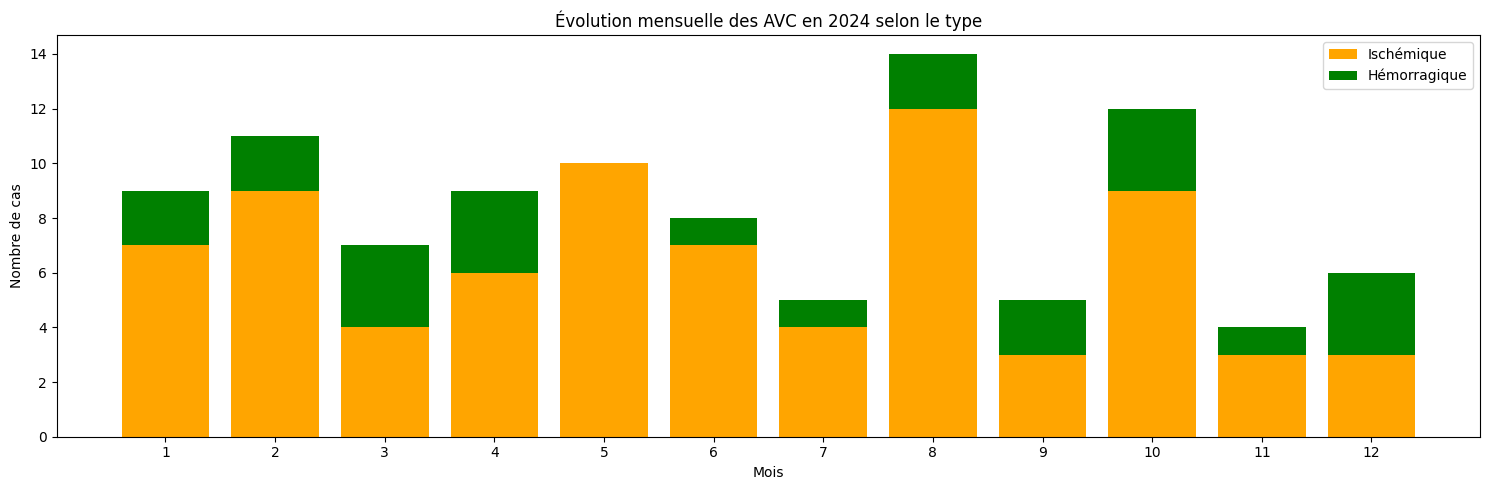

Type_AVC
Ischémique      77
Hémorragique    23
Name: count, dtype: int64


In [51]:
# TODO Écrire votre code ici pour la question bonus
df_avc["Mois"] = pd.to_datetime(df_avc["Date_survenue"]).dt.month
df_mois = df_avc.groupby(["Mois", "Type_AVC"]).size().unstack(fill_value=0)

plt.figure(figsize=(15,5))

plt.bar(df_mois.index, df_mois["Ischémique"], color="orange", label="Ischémique")
plt.bar(df_mois.index, df_mois["Hémorragique"], bottom=df_mois["Ischémique"], color="green", label="Hémorragique")

plt.title("Évolution mensuelle des AVC en 2024 selon le type")
plt.xlabel("Mois")
plt.ylabel("Nombre de cas")
plt.xticks(range(1,13))
plt.legend()

plt.tight_layout()
plt.show()

print(df_avc['Type_AVC'].value_counts())